# Boston House Price Prediction

In the Boston House Price Prediction Project, we are building a predictive model to evaluate the price of a house with provided parameters.

The parameters into consideration are - Per Capita Crime Rate by Town, Nitric Oxide Concentration, Weighted Distances to five Boston Employment Centres, Tax, etc.

In [33]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor


### Data Collection & pre-processing

In [34]:
#Collecting data
boston_df=pd.read_csv('HousingData.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [35]:
#Dimension of dataframe
boston_df.shape

(506, 14)

In [36]:
#Checking for missing values
boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

C:\Users\Anji\AppData\Local\Temp\ipykernel_12112\4187960400.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['CRIM'].fillna(boston_df['CRIM'].median(),inplace=True)


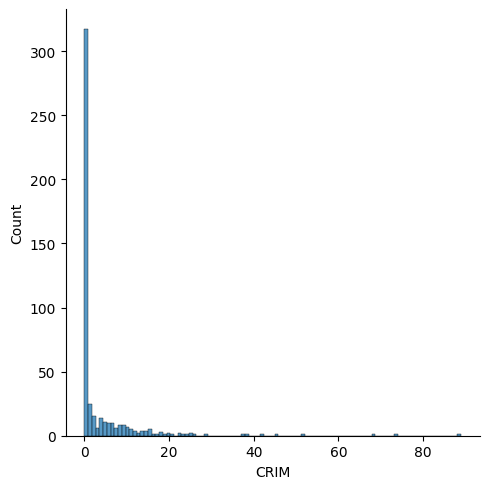

In [37]:
# Checking the distribution of missing columns


sns.displot(data=boston_df,x='CRIM')

boston_df['CRIM'].fillna(boston_df['CRIM'].median(),inplace=True)


C:\Users\Anji\AppData\Local\Temp\ipykernel_12112\3908516323.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['ZN'].fillna(boston_df['ZN'].median(),inplace=True)


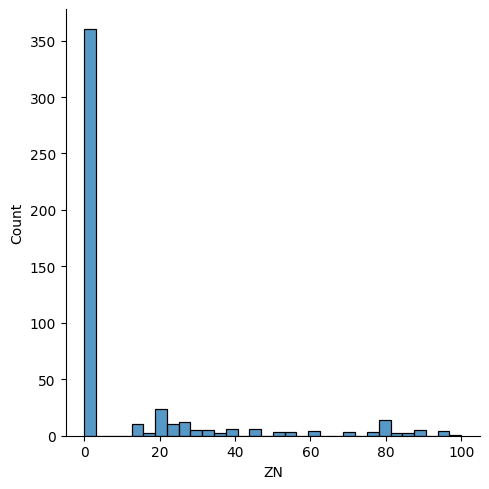

In [38]:
sns.displot(data=boston_df,x='ZN')

boston_df['ZN'].fillna(boston_df['ZN'].median(),inplace=True)


C:\Users\Anji\AppData\Local\Temp\ipykernel_12112\3857726604.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['INDUS'].fillna(boston_df['INDUS'].median(),inplace=True)


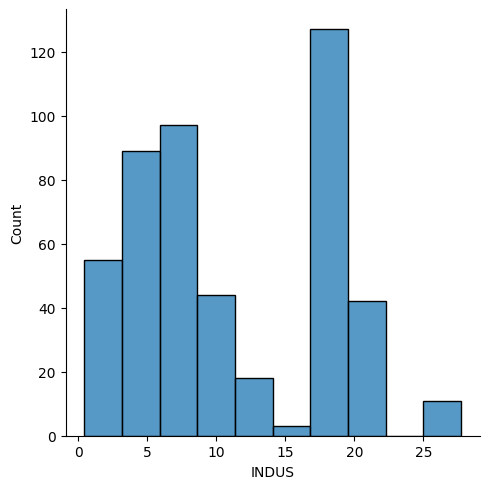

In [39]:
sns.displot(data=boston_df,x='INDUS')

boston_df['INDUS'].fillna(boston_df['INDUS'].median(),inplace=True)

C:\Users\Anji\AppData\Local\Temp\ipykernel_12112\2201343874.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['CHAS'].fillna(boston_df['CHAS'].mode()[0],inplace=True)


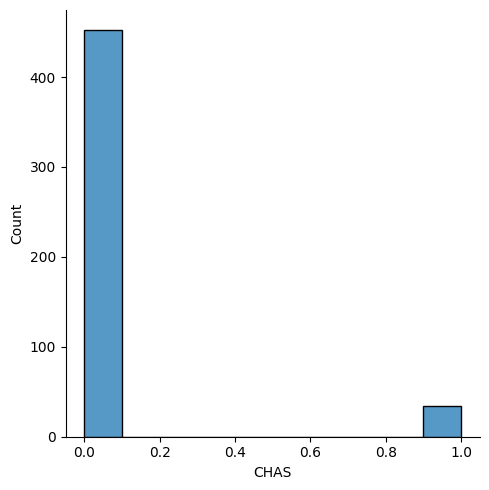

In [50]:
sns.displot(data=boston_df,x='CHAS')
'''Use the Mode (most frequent value)
Since CHAS is categorical and binary:
The mode is 0.
Filling with the mode keeps the class distribution realistic.
Avoids biasing the model by introducing rare values (1) too often.'''
boston_df['CHAS'].fillna(boston_df['CHAS'].mode()[0],inplace=True)


C:\Users\Anji\AppData\Local\Temp\ipykernel_12112\2589697933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['AGE'].fillna(boston_df['AGE'].median(),inplace=True)


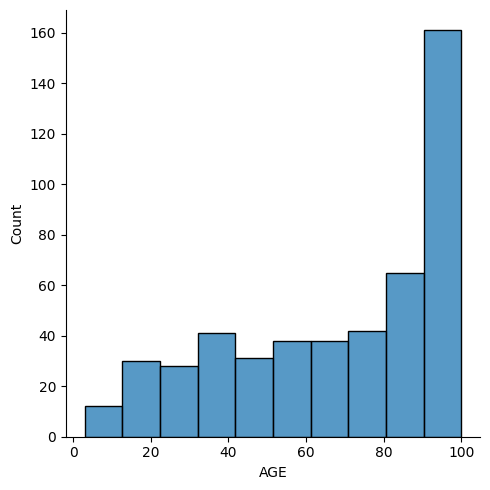

In [41]:
sns.displot(data=boston_df,x='AGE')

boston_df['AGE'].fillna(boston_df['AGE'].median(),inplace=True)

C:\Users\Anji\AppData\Local\Temp\ipykernel_12112\2011551731.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['LSTAT'].fillna(boston_df['LSTAT'].median(),inplace=True)


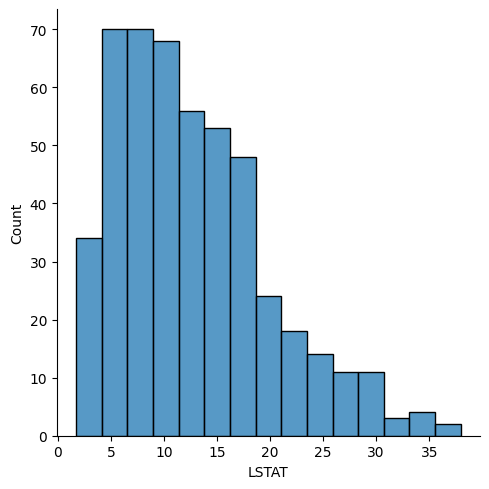

In [42]:
sns.displot(data=boston_df,x='LSTAT')

boston_df['LSTAT'].fillna(boston_df['LSTAT'].median(),inplace=True)

In [51]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [53]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [56]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
## splitting feature & outcomes
boston_features=boston_df.drop(columns='MEDV',axis=1)
boston_outcomes=boston_df['MEDV']

print("Features of boston: \n",boston_features)
print("Outcomes of boston: \n",boston_outcomes)

Features of boston: 
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  76.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.

### ✅ When You Should Standardize:

Standardization (mean = 0, std = 1) is recommended when using models that are sensitive to the scale of input features, such as:

| **Regression Model**                     | **Standardization Needed?** | **Why?**                                                    |
|------------------------------------------|------------------------------|-------------------------------------------------------------|
| Linear Regression (incl. Ridge, Lasso)   | ✅ Yes                       | Regularization terms depend on feature magnitude            |
| Logistic Regression                      | ✅ Yes                       | Same as above if used with regularization                   |
| Support Vector Regression (SVR)          | ✅ Yes                       | Uses distances between points                               |
| K-Nearest Neighbors (KNN)                | ✅ Yes                       | Distance-based model                                        |
| Principal Component Regression (PCR)     | ✅ Yes                       | PCA is scale-sensitive                                      |
| Neural Networks                          | ✅ Yes                       | Helps gradients converge faster                             |
| Gradient Boosting / **XGBoost** / LightGBM   | ❌ Not necessary             | Tree-based models aren't affected by feature scale          |
| Decision Trees / Random Forests          | ❌ Not necessary             | Splits are based on feature values, not distance            |


### Splitting into training & test data

- as it is XGBoost model, no need for data standardization

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(boston_features,boston_outcomes,test_size=0.2,random_state=3)

print(f"Dimension of boston data: {boston_features.shape}\nDimension of training data: {X_train.shape}\nDimension of test data: {X_test.shape}\n")

Dimension of boston data: (506, 13)
Dimension of training data: (404, 13)
Dimension of test data: (102, 13)



### Training Model

In [59]:
booster=XGBRegressor()

booster.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Prediction on training data

- As, it is a regression problem, we can't use accuracy score
- Here, we use R squared & mean absolute error

In [ ]:
# prediction the training dataset's outcome ,which wil be compared with Y_train
training_prediction=booster.predict(X_train)
print("Prediction on training data: \n", training_prediction)

Prediction on training data: 
 [14.8917055 19.646105  35.38867   12.002547  20.387453  23.70026
 21.004038  49.992687  27.486404  12.715835  17.384724  23.8029
 22.889175  18.509     30.291883  31.180548  16.005768  23.339895
 15.0019    10.211383  12.511794  19.60893   19.689213  19.505726
 15.022552  35.405632  13.505481  20.610485  24.69772   21.8992
 17.126324  23.635159  21.098623  15.586212  18.53806    8.301664
 14.501341  23.913406  11.799059  24.593416  24.80091   18.712376
 17.888191  48.815132  13.007776  29.600859  18.010868  20.091223
 17.30234   23.105291  22.600063  13.796328  43.807762  35.19627
 22.603706  17.44282   48.517265  31.504808  15.6059675 14.211675
 20.595612  22.035624  20.105505  17.599133  23.699602  14.099918
 19.80298   24.424768  33.40369   39.78985   34.904568  24.768476
 14.638098  23.370262  33.80167   23.86724    9.592791  21.782288
 31.656948  14.502374   7.204912  24.094755  21.393492  17.200434
 45.99461   23.122261  14.491678  20.485321  16.986

In [ ]:
# We have to check , how differ the predicitive price with the actual price

## R squared error & Mean absolute error
prediction_squared_error=metrics.r2_score(Y_train,training_prediction)
prediction_absolute_error=metrics.mean_absolute_error(Y_train,training_prediction)

print("R squared error of training data: ",prediction_squared_error)
print("Mean Absolute error of training data: ",prediction_absolute_error)

R squared error of training data:  0.9999958931000588
Mean Absolute error of training data:  0.013131060222587894


### Visulaising the differ with actual price

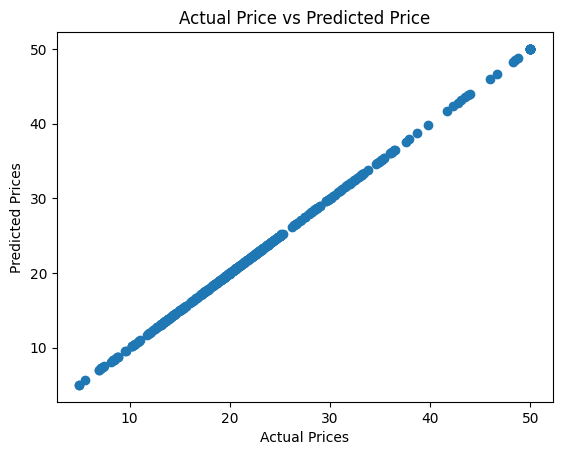

In [73]:
plt.scatter(Y_train,training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

### Model Evaluation

In [80]:
test_data_prediction=booster.predict(X_test)
print("Test data Prediction: \n", test_data_prediction)

test_squared_error=metrics.r2_score(Y_test,test_data_prediction)
test_absolute_error=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error of testing data: ",test_squared_error)
print("Mean Absolute error of testing data: ",test_absolute_error)


Test data Prediction: 
 [49.35522   19.247412  15.790314  32.324585  21.898626  23.413046
 13.842749   6.8758326 20.662167  15.7882395 17.2767    31.28144
 34.05424   30.72127    5.946074  11.725229  20.140167  14.291328
 13.690575  22.977985  25.695988  44.56337   22.768671  22.817747
 10.796556  24.134533  20.290934  22.156967  20.172205  21.145779
 14.902035  33.194077  17.889544  21.616428  19.29606   21.682829
 22.66936   34.187416  20.738008  22.239828  15.814898   9.560581
 22.453712  14.478156  21.274292  25.85206   21.516674  18.794912
 26.761343  21.115305  29.93145   19.835562  47.845963  18.32985
 20.679607  19.581345  50.33836   15.20974   30.292772  20.306072
 20.719332  21.920033  33.44054   31.342478  20.606604  23.608372
 34.79765   22.36574   28.294756  24.873016  24.108198  29.65669
 16.607933  29.345148  10.963873  19.636524  18.915514  25.903193
 22.559807  14.760072  25.452791  18.827995  14.725956  20.798265
 26.36812    9.6888075 24.272396  10.114823  19.804857 